<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/students_doubts/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile

In [2]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [3]:
# all images are load in variable x...
Arq =['Banana.zip','Orange.zip','Peach.zip','Pitaya.zip']

Arq =['Banana.zip',
      'Mango.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)


In [4]:
# img.shape

In [5]:
print(img_name)

['Banana/', 'Banana/Banana010.png', 'Banana/Banana011.png', 'Banana/Banana012.png', 'Banana/Banana013.png', 'Banana/Banana014.png', 'Banana/Banana015.png', 'Banana/Banana016.png', 'Banana/Banana017.png', 'Banana/Banana018.png', 'Banana/Banana019.png', 'Banana/Banana02.png', 'Banana/Banana020.png', 'Banana/Banana021.png', 'Banana/Banana022.png', 'Banana/Banana023.png', 'Banana/Banana024.png', 'Banana/Banana025.png', 'Banana/Banana026.png', 'Banana/Banana027.png', 'Banana/Banana028.png', 'Banana/Banana029.png', 'Banana/Banana03.png', 'Banana/Banana030.png', 'Banana/Banana031.png', 'Banana/Banana032.png', 'Banana/Banana033.png', 'Banana/Banana034.png', 'Banana/Banana035.png', 'Banana/Banana036.png', 'Banana/Banana037.png', 'Banana/Banana038.png', 'Banana/Banana039.png', 'Banana/Banana04.png', 'Banana/Banana040.png', 'Banana/Banana041.png', 'Banana/Banana042.png', 'Banana/Banana043.png', 'Banana/Banana044.png', 'Banana/Banana045.png', 'Banana/Banana046.png', 'Banana/Banana047.png', 'Banana

In [6]:
'''Ind = 44
img=plt.imread(img_name[Ind])
plt.axis("off")
plt.imshow(x[Ind])
plt.title(img_name[Ind])'''

'Ind = 44\nimg=plt.imread(img_name[Ind])\nplt.axis("off")\nplt.imshow(x[Ind])\nplt.title(img_name[Ind])'

In [7]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [8]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [9]:
print(unique_list)

['Ban', 'Man']


In [10]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [11]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [12]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [13]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  # X_train.append(cv2.resize(cv2.imread(name),(50,50)))
  X_train.append(cv2.imread(name))
  Y_train.append(y[II])

In [14]:
X_test= []
Y_test = []
for II in Ind_test:
  name = img_name[II]
  X_test.append(cv2.imread(name))
  Y_test.append(y[II])

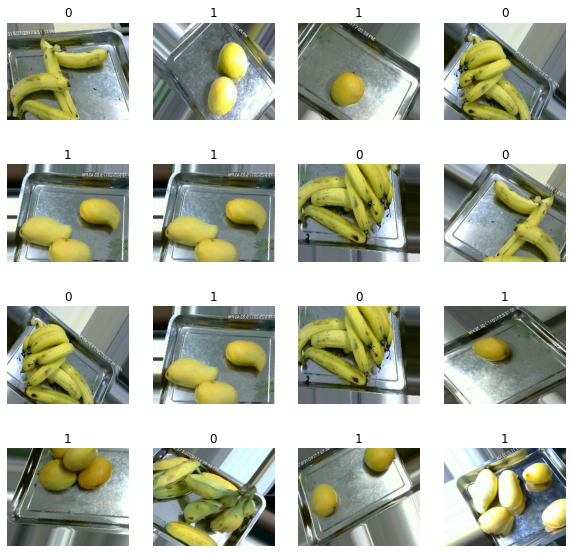

In [15]:
# view some images from the train_ds
# num,cols,dim = np.array(X_train[0]).shape
num = len(Y_train)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_train[kk])
  plt.axis("off")

In [16]:
num

58

In [17]:
a = np.array(X_train).shape; print(a)

(58,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [18]:
a = np.array(X_test).shape; print(a[0])

15


In [19]:
X_train[0]

array([[[109, 111,  98],
        [109, 111,  98],
        [109, 111,  98],
        ...,
        [ 84,  88,  89],
        [195, 198, 200],
        [195, 198, 200]],

       [[107, 109,  96],
        [107, 109,  96],
        [109, 111,  98],
        ...,
        [ 81,  91,  98],
        [218, 229, 236],
        [ 94,  98,  90]],

       [[107, 109,  96],
        [107, 109,  96],
        [107, 109,  96],
        ...,
        [ 62,  81,  94],
        [218, 229, 236],
        [221, 225, 217]],

       ...,

       [[119, 126, 118],
        [119, 126, 118],
        [119, 126, 118],
        ...,
        [ 94,  86,  56],
        [ 97,  89,  60],
        [ 91,  91,  66]],

       [[179, 186, 178],
        [179, 186, 178],
        [179, 186, 178],
        ...,
        [ 98,  90,  61],
        [101,  93,  63],
        [ 97,  98,  70]],

       [[167, 174, 166],
        [167, 174, 166],
        [167, 174, 166],
        ...,
        [127, 120,  98],
        [127, 120,  98],
        [122, 122, 102]]

In [20]:
np.array(X_test).shape

(15, 258, 320, 3)

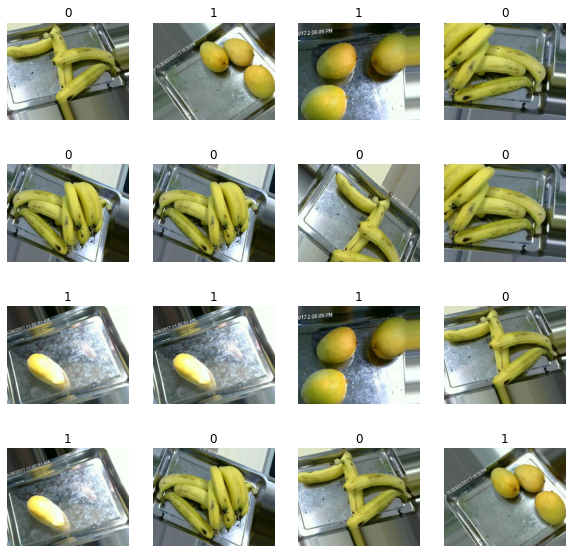

In [21]:
# view some images from the train_ds
# num,- = np.array(X_test).shape
num = len(Y_test)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_test[kk])
  plt.axis("off")

In [22]:
np.array(X_test).shape

(15, 258, 320, 3)

In [23]:
num

15